/home/karel/skola/diplomka/crosscorr/code/measurements/visualization


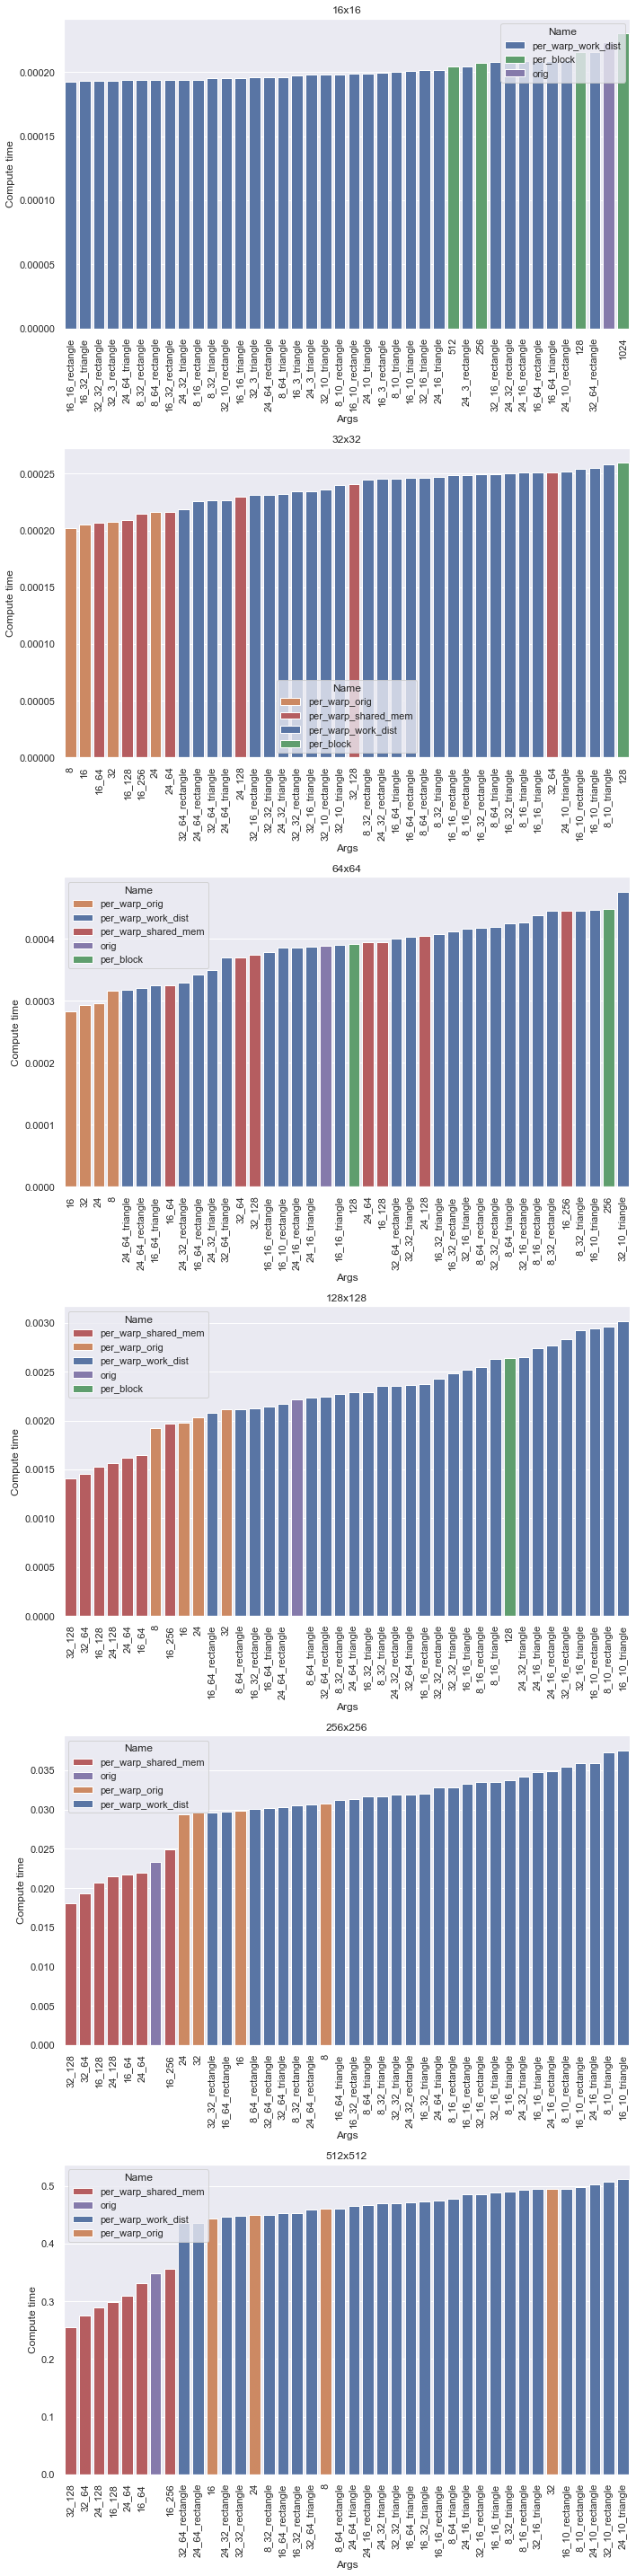

In [15]:
import re
import os

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "test" / "block_per_shift")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

palette = dict(zip(results["Name"].unique(), sns.color_palette(n_colors=results["Name"].nunique())))

sns.set(rc={'figure.figsize': (10, 40)})
fig, axs = plt.subplots(nrows=results["Input matrix rows"].nunique())
for idx, input_rows in enumerate(results["Input matrix rows"].unique()):
    filtered = results[results["Input matrix rows"] == input_rows]
    d = filtered.head(40)
    ax = sns.barplot(data=d, x="Args", y="Compute time", hue="Name", ax=axs[idx], dodge=False, palette=palette)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(f"{input_rows}x{input_rows}")

fig.tight_layout()


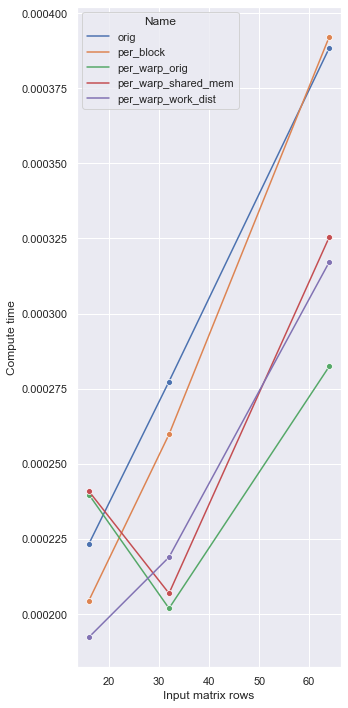

In [20]:


import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "test" / "block_per_shift")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)
data = data[data["Input matrix rows"] <= 64]
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

alg_mins = results.groupby(["Name", "Input matrix rows"])["Compute time"].min().to_frame("Compute time")

sns.set(rc={'figure.figsize': (5, 10)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=alg_mins, x="Input matrix rows", y="Compute time", hue="Name", marker='o', ax=ax)
fig.tight_layout()

64x64 Shared mem improvement: 0.18218676469476414%
16x16 Work dist improvement: 0.07205649916110102%


/tmp/ipykernel_10222/254939559.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


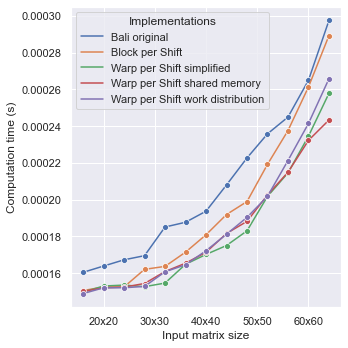

In [21]:


import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

presentable_names = {
    "orig": "Bali original",
    "per_block": "Block per Shift",
    "per_warp_orig": "Warp per Shift simplified",
    "per_warp_shared_mem": "Warp per Shift shared memory",
    "per_warp_work_dist": "Warp per Shift work distribution"
}

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "block_per_shift")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

alg_mins = results.groupby(["Name", "Input matrix rows"])["Compute time"].min().to_frame("Compute time")

improvement = 1 - (alg_mins.loc[("per_warp_shared_mem", 64), "Compute time"] / alg_mins.loc[("orig", 64), "Compute time"])

print(f"64x64 Shared mem improvement: {improvement}%")

improvement = 1 - (alg_mins.loc[("per_warp_work_dist", 16), "Compute time"] / alg_mins.loc[("orig", 16), "Compute time"])
print(f"16x16 Work dist improvement: {improvement}%")

alg_mins = alg_mins.reset_index()
alg_mins["Implementations"] = alg_mins["Name"].map(presentable_names)

sns.set(rc={'figure.figsize': (5, 5)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=alg_mins, x="Input matrix rows", y="Compute time", hue="Implementations", marker='o', ax=ax)
ticks = ax.get_xticks()
ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
ax.set_xticklabels(ticks)
ax.set_xlabel("Input matrix size")
ax.set_ylabel("Computation time (s)")
fig.tight_layout()

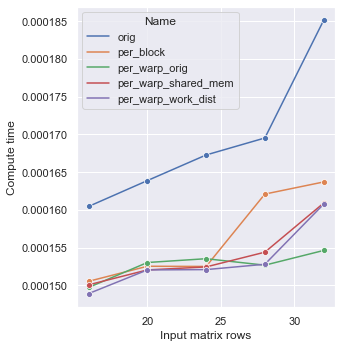

In [4]:

import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "block_per_shift")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)
data = data[data["Input matrix rows"] <= 32]
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

alg_mins = results.groupby(["Name", "Input matrix rows"])["Compute time"].min().to_frame("Compute time")

sns.set(rc={'figure.figsize': (5, 5)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=alg_mins, x="Input matrix rows", y="Compute time", hue="Name", marker='o', ax=ax)
fig.tight_layout()

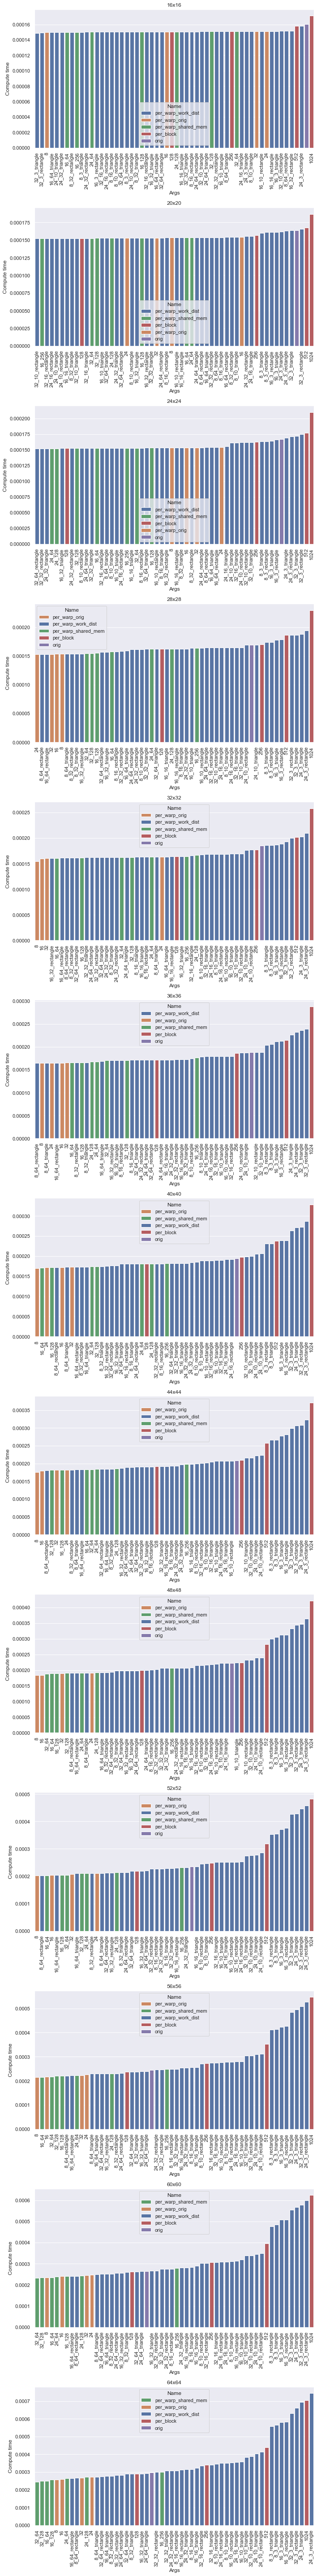

In [3]:
import re
import os

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "block_per_shift")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

palette = dict(zip(results["Name"].unique(), sns.color_palette(n_colors=results["Name"].nunique())))

sns.set(rc={'figure.figsize': (10, 80)})
fig, axs = plt.subplots(nrows=results["Input matrix rows"].nunique())
for idx, input_rows in enumerate(results["Input matrix rows"].unique()):
    filtered = results[results["Input matrix rows"] == input_rows]
    # d = filtered.head(40)
    d = filtered
    ax = sns.barplot(data=d, x="Args", y="Compute time", hue="Name", ax=axs[idx], dodge=False, palette=palette)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(f"{input_rows}x{input_rows}")

fig.tight_layout()

/tmp/ipykernel_56548/3035598640.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


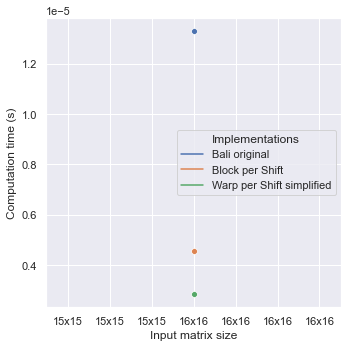

In [3]:


import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

presentable_names = {
    "orig": "Bali original",
    "per_block": "Block per Shift",
    "per_warp_orig": "Warp per Shift simplified",
    "per_warp_shared_mem": "Warp per Shift shared memory",
    "per_warp_work_dist": "Warp per Shift work distribution"
}

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "block_per_shift")

data = pd.concat([run.data for run in benchmark.groups["one_to_one_algorithm"].runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Kernel"].mean() / 1e9
compute_times.name = "Kernel runtime"
results = compute_times.reset_index().sort_values("Kernel runtime")

alg_mins = results.groupby(["Name", "Input matrix rows"])["Kernel runtime"].min().to_frame("Kernel runtime")

# improvement = 1 - (alg_mins.loc[("per_warp_shared_mem", 64), "Kernel runtime"] / alg_mins.loc[("orig", 64), "Kernel runtime"])
#
# print(f"64x64 Shared mem improvement: {improvement}%")
#
# improvement = 1 - (alg_mins.loc[("per_warp_work_dist", 16), "Kernel runtime"] / alg_mins.loc[("orig", 16), "Kernel runtime"])
# print(f"16x16 Work dist improvement: {improvement}%")

alg_mins = alg_mins.reset_index()
alg_mins["Implementations"] = alg_mins["Name"].map(presentable_names)

sns.set(rc={'figure.figsize': (5, 5)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=alg_mins, x="Input matrix rows", y="Kernel runtime", hue="Implementations", marker='o', ax=ax)
ticks = ax.get_xticks()
ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
ax.set_xticklabels(ticks)
ax.set_xlabel("Input matrix size")
ax.set_ylabel("Computation time (s)")
fig.tight_layout()

/tmp/ipykernel_72180/2809987211.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


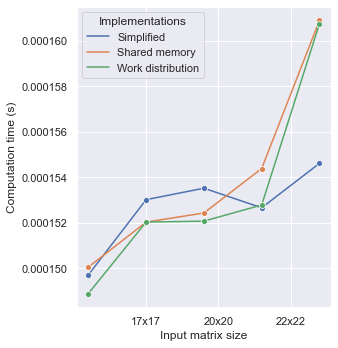

In [1]:


import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

presentable_names = {
    "per_warp_orig": "Simplified",
    "per_warp_shared_mem": "Shared memory",
    "per_warp_work_dist": "Work distribution"
}

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "block_per_shift")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)

data = data[(data["Name"] != "per_block") & (data["Name"] != "orig")]
data = data[data["Input matrix rows"] <= 32]

grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

alg_mins = results.groupby(["Name", "Input matrix rows"])["Compute time"].min().to_frame("Compute time")

alg_mins = alg_mins.reset_index()
alg_mins["Implementations"] = alg_mins["Name"].map(presentable_names)

sns.set(rc={'figure.figsize': (5, 5)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=alg_mins, x="Input matrix rows", y="Compute time", hue="Implementations", marker='o', ax=ax)
ticks = ax.get_xticks()
ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
ax.set_xticklabels(ticks)
ax.set_xlabel("Input matrix size")
ax.set_ylabel("Computation time (s)")
fig.tight_layout()
fig.savefig("warp_per_shift_work_dist_local_results.svg", format="svg")

/tmp/ipykernel_56548/4181807342.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


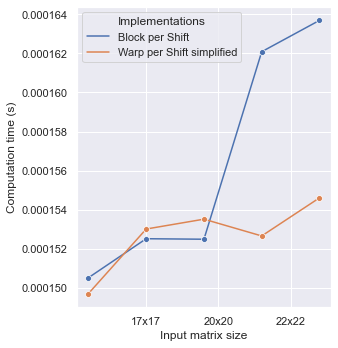

In [12]:


import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

presentable_names = {
    "orig": "Bali original",
    "per_block": "Block per Shift",
    "per_warp_orig": "Warp per Shift simplified",
    "per_warp_shared_mem": "Warp per Shift shared memory",
    "per_warp_work_dist": "Warp per Shift work distribution"
}

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "block_per_shift")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)
data = data[(data["Name"] != "per_warp_shared_mem") & (data["Name"] != "per_warp_work_dist") & (data["Name"] != "orig")]
data = data[data["Input matrix rows"] <= 32]

grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

alg_mins = results.groupby(["Name", "Input matrix rows"])["Compute time"].min().to_frame("Compute time")

alg_mins = alg_mins.reset_index()
alg_mins["Implementations"] = alg_mins["Name"].map(presentable_names)

sns.set(rc={'figure.figsize': (5, 5)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=alg_mins, x="Input matrix rows", y="Compute time", hue="Implementations", marker='o', ax=ax)
ticks = ax.get_xticks()
ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
ax.set_xticklabels(ticks)
ax.set_xlabel("Input matrix size")
ax.set_ylabel("Computation time (s)")
fig.tight_layout()
fig.savefig("block_per_shift_local_results.svg", format="svg")

# Warp shuffle algs measurements block per shift comparison

/tmp/ipykernel_31354/4292156921.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


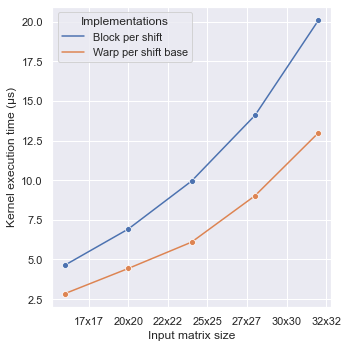

In [20]:

import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

presentable_names = {
    "basic": "Basic",
    "nai_block_per_shift": "Block per shift",
    "nai_warp_per_shift": "Warp per shift base",
    "nai_warp_per_shift_shared_mem": "Warp per shift with shared memory",
    "nai_warp_per_shift_work_distribution": "Warp per shift with work distribution"
}

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "warp_per_shift_optimizations_speedup")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)
data = data[(data["Name"] == "nai_warp_per_shift") | (data["Name"] == "nai_block_per_shift")]
data = data[data["Input matrix rows"] <= 32]

grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Kernel"].mean() / 1e3
compute_times.name = "Kernel time"
results = compute_times.reset_index().sort_values("Kernel time")

alg_mins = results.groupby(["Name", "Input matrix rows"])["Kernel time"].min().to_frame("Kernel time")

alg_mins = alg_mins.reset_index()
alg_mins["Implementations"] = alg_mins["Name"].map(presentable_names)

sns.set(rc={'figure.figsize': (5, 5)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=alg_mins, x="Input matrix rows", y="Kernel time", hue="Implementations", marker='o', ax=ax)
ticks = ax.get_xticks()
ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
ax.set_xticklabels(ticks)
ax.set_xlabel("Input matrix size")
ax.set_ylabel("Kernel execution time (μs)")
fig.tight_layout()
fig.savefig("block_per_shift_local_results.svg", format="svg")

# GPULAB Warp shuffle algs measurements block per shift comparison

/tmp/ipykernel_31354/3433265966.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


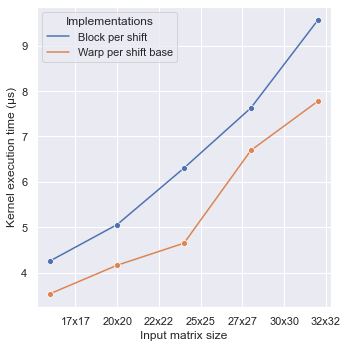

In [23]:


import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

presentable_names = {
    "basic": "Basic",
    "nai_block_per_shift": "Block per shift",
    "nai_warp_per_shift": "Warp per shift base",
    "nai_warp_per_shift_shared_mem": "Warp per shift with shared memory",
    "nai_warp_per_shift_work_distribution": "Warp per shift with work distribution"
}

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "warp_per_shift_optimizations_speedup_gpulab")

data = pd.concat([run.data for run in benchmark.groups["one_to_one"].runs], axis=0, ignore_index=True)
data = data[(data["Name"] == "nai_warp_per_shift") | (data["Name"] == "nai_block_per_shift")]
data = data[data["Input matrix rows"] <= 32]

grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Kernel"].mean() / 1e3
compute_times.name = "Kernel time"
results = compute_times.reset_index().sort_values("Kernel time")

alg_mins = results.groupby(["Name", "Input matrix rows"])["Kernel time"].min().to_frame("Kernel time")

alg_mins = alg_mins.reset_index()
alg_mins["Implementations"] = alg_mins["Name"].map(presentable_names)

sns.set(rc={'figure.figsize': (5, 5)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=alg_mins, x="Input matrix rows", y="Kernel time", hue="Implementations", marker='o', ax=ax)
ticks = ax.get_xticks()
ticks = [f"{int(num_rows)}x{int(num_rows)}" for num_rows in ticks]
ax.set_xticklabels(ticks)
ax.set_xlabel("Input matrix size")
ax.set_ylabel("Kernel execution time (μs)")
fig.tight_layout()
fig.savefig("block_per_shift_local_results.svg", format="svg")